In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
from collections import defaultdict
koha_initial_file = "koha_initial_data.csv"
koha_dataframe = pd.read_csv(koha_initial_file, sep=";", parse_dates = ["datetime"])

Reading in a csv file derived from Koha database. File contains information about transaction type - checkout, renewal, or recorded local use - and book information associated with the transaction type - date, call number, title, and subjects (derived from marcxml).

After reading in csv file, display as a dataframe.

In [2]:
koha_dataframe

,type,datetime,itemcallnumber,title,subjects
0,issue,2012-05-29 13:59:06,HV8143.S86,Opportunities in law enforcement and criminal ...,Police Vocational guidance United States. Law ...
1,issue,2012-06-01 08:16:26,RA441.O83 2005,Finding work in global health :,World health Vocational guidance. Vocational g...
2,issue,2012-06-04 10:50:38,HF5382.75.U6.B755 2010,You majored in what? :,College graduates Employment United States. Co...
3,issue,2012-07-11 09:32:01,HD6051.1.HF5381 2003,Career guide and directory for immigrant profe...,"Vocational guidance United States Handbooks, m..."
4,issue,2012-07-11 09:59:09,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ..."
5,issue,2012-07-11 10:06:15,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ..."
6,issue,2012-07-11 10:08:36,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ..."
7,issue,2012-07-13 14:48:09,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ..."
8,localuse,2012-07-13 14:52:42,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ..."
9,localuse,2012-07-13 14:57:00,HF5381.LB2300 2007,Transitions : a guide for the transfer student /,College students United States. College studen...


In [3]:
koha_dataframe.datetime

0      2012-05-29 13:59:06
1      2012-06-01 08:16:26
2      2012-06-04 10:50:38
3      2012-07-11 09:32:01
4      2012-07-11 09:59:09
5      2012-07-11 10:06:15
6      2012-07-11 10:08:36
7      2012-07-13 14:48:09
8      2012-07-13 14:52:42
9      2012-07-13 14:57:00
10     2012-08-03 13:21:23
11     2012-08-03 13:21:31
12     2012-08-03 13:21:54
13     2012-08-20 09:00:47
14     2012-08-20 09:01:08
15     2012-08-23 10:17:39
16     2012-08-23 10:20:13
17     2012-08-23 10:22:12
18     2012-08-27 14:35:56
19     2012-08-30 13:09:48
20     2012-08-30 13:11:55
21     2012-08-30 13:45:11
22     2012-08-30 14:20:14
23     2012-09-04 10:00:49
24     2012-09-05 16:59:35
25     2012-09-05 17:00:03
26     2012-09-06 09:11:40
27     2012-09-07 08:37:12
28     2012-09-07 08:37:54
29     2012-09-10 11:07:22
               ...        
1701   2017-02-14 13:14:30
1702   2017-02-14 15:16:58
1703   2017-02-15 10:18:28
1704   2017-02-15 10:18:28
1705   2017-02-22 12:48:04
1706   2017-02-23 14:21:47
1

Because I want to be able to plot circulation statistics over time, I wanted to first get rid of the timestamp so I could see circulation by date. I then added it to the dataframe.

In [4]:
koha_dataframe["date"] = koha_dataframe.datetime.dt.date

In [5]:
koha_dataframe

,type,datetime,itemcallnumber,title,subjects,date
0,issue,2012-05-29 13:59:06,HV8143.S86,Opportunities in law enforcement and criminal ...,Police Vocational guidance United States. Law ...,2012-05-29
1,issue,2012-06-01 08:16:26,RA441.O83 2005,Finding work in global health :,World health Vocational guidance. Vocational g...,2012-06-01
2,issue,2012-06-04 10:50:38,HF5382.75.U6.B755 2010,You majored in what? :,College graduates Employment United States. Co...,2012-06-04
3,issue,2012-07-11 09:32:01,HD6051.1.HF5381 2003,Career guide and directory for immigrant profe...,"Vocational guidance United States Handbooks, m...",2012-07-11
4,issue,2012-07-11 09:59:09,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ...",2012-07-11
5,issue,2012-07-11 10:06:15,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ...",2012-07-11
6,issue,2012-07-11 10:08:36,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ...",2012-07-11
7,issue,2012-07-13 14:48:09,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ...",2012-07-13
8,localuse,2012-07-13 14:52:42,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ...",2012-07-13
9,localuse,2012-07-13 14:57:00,HF5381.LB2300 2007,Transitions : a guide for the transfer student /,College students United States. College studen...,2012-07-13


Used the code below to delete the datetime column.

In [6]:
koha_dataframe.drop('datetime', axis=1, inplace=True)

In [7]:
koha_dataframe

,type,itemcallnumber,title,subjects,date
0,issue,HV8143.S86,Opportunities in law enforcement and criminal ...,Police Vocational guidance United States. Law ...,2012-05-29
1,issue,RA441.O83 2005,Finding work in global health :,World health Vocational guidance. Vocational g...,2012-06-01
2,issue,HF5382.75.U6.B755 2010,You majored in what? :,College graduates Employment United States. Co...,2012-06-04
3,issue,HD6051.1.HF5381 2003,Career guide and directory for immigrant profe...,"Vocational guidance United States Handbooks, m...",2012-07-11
4,issue,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ...",2012-07-11
5,issue,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ...",2012-07-11
6,issue,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ...",2012-07-11
7,issue,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ...",2012-07-13
8,localuse,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ...",2012-07-13
9,localuse,HF5381.LB2300 2007,Transitions : a guide for the transfer student /,College students United States. College studen...,2012-07-13


In [8]:
date_list = koha_dataframe['date']

In [9]:
date_list

0       2012-05-29
1       2012-06-01
2       2012-06-04
3       2012-07-11
4       2012-07-11
5       2012-07-11
6       2012-07-11
7       2012-07-13
8       2012-07-13
9       2012-07-13
10      2012-08-03
11      2012-08-03
12      2012-08-03
13      2012-08-20
14      2012-08-20
15      2012-08-23
16      2012-08-23
17      2012-08-23
18      2012-08-27
19      2012-08-30
20      2012-08-30
21      2012-08-30
22      2012-08-30
23      2012-09-04
24      2012-09-05
25      2012-09-05
26      2012-09-06
27      2012-09-07
28      2012-09-07
29      2012-09-10
           ...    
1701    2017-02-14
1702    2017-02-14
1703    2017-02-15
1704    2017-02-15
1705    2017-02-22
1706    2017-02-23
1707    2017-02-24
1708    2017-02-28
1709    2017-02-28
1710    2017-03-08
1711    2017-03-09
1712    2017-03-09
1713    2017-03-10
1714    2017-03-10
1715    2017-03-15
1716    2017-03-15
1717    2017-03-15
1718    2017-03-27
1719    2017-03-27
1720    2017-03-27
1721    2017-03-27
1722    2017

In [10]:
date_counts = defaultdict(int)
for date in date_list:
    date_counts[date] += 1


In [11]:
date_df = pd.Series(date_counts, name="Date_df")

In [12]:
date_df

2012-05-29    1
2012-06-01    1
2012-06-04    1
2012-07-11    4
2012-07-13    3
2012-08-03    3
2012-08-20    2
2012-08-23    3
2012-08-27    1
2012-08-30    4
2012-09-04    1
2012-09-05    2
2012-09-06    1
2012-09-07    2
2012-09-10    3
2012-09-11    2
2012-09-12    2
2012-09-13    2
2012-09-18    1
2012-09-19    1
2012-09-20    1
2012-09-21    3
2012-09-24    1
2012-09-26    3
2012-09-27    3
2012-09-28    2
2012-10-01    3
2012-10-02    1
2012-10-03    2
2012-10-05    1
             ..
2016-12-12    6
2016-12-20    2
2016-12-22    1
2017-01-03    1
2017-01-04    1
2017-01-05    1
2017-01-06    1
2017-01-20    4
2017-01-24    3
2017-01-27    1
2017-01-30    2
2017-02-01    1
2017-02-03    1
2017-02-07    1
2017-02-08    2
2017-02-14    2
2017-02-15    2
2017-02-22    1
2017-02-23    1
2017-02-24    1
2017-02-28    2
2017-03-08    1
2017-03-09    2
2017-03-10    2
2017-03-15    3
2017-03-27    4
2017-03-29    3
2017-03-31    1
2017-04-05    3
2017-04-07    2
Name: Date_df, dtype: in

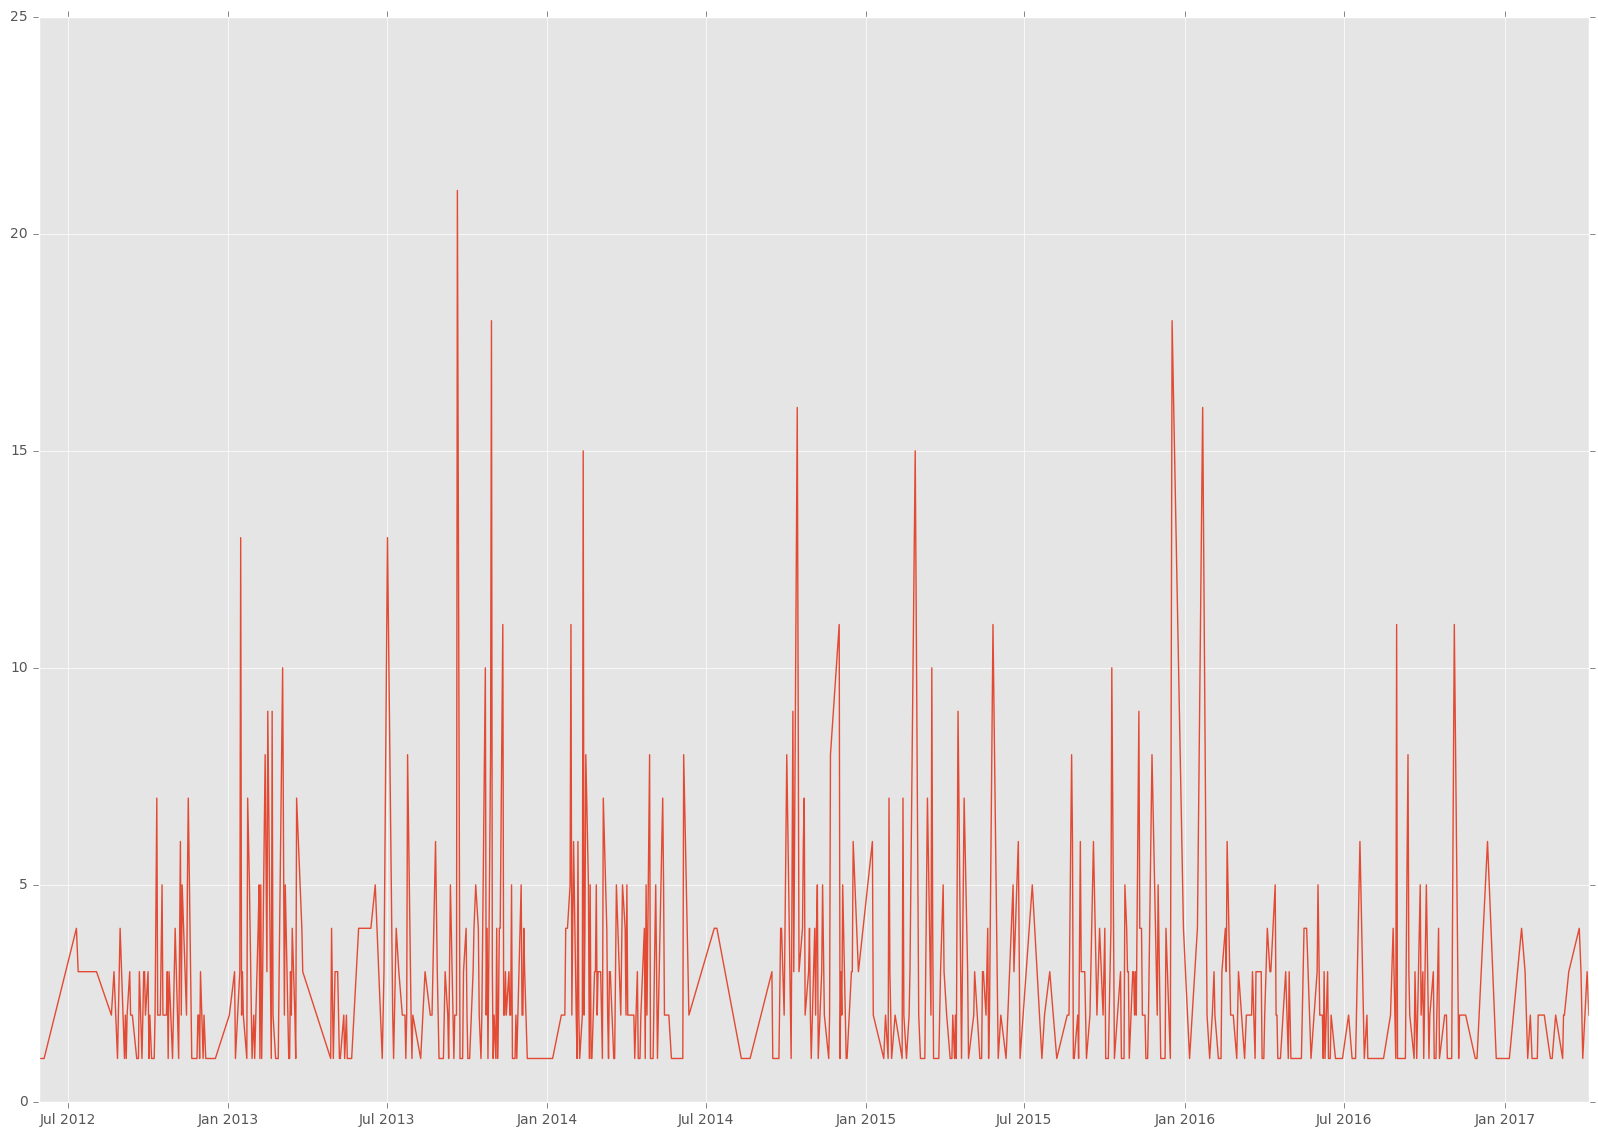

In [36]:
fig=plt.figure(figsize=(20, 14), dpi= 80)
date_df.plot()

Second part of final project is trying to understand topic popularity, so I want to extract the subjects from the subjects column.

First converted the subject column to a list with .tolist().

In [14]:
subject_list = koha_dataframe['subjects'].tolist()

In [15]:
subject_list

['Police Vocational guidance United States. Law enforcement Vocational guidance United States. Criminal justice, Administration of Vocational guidance United States. Police. Law enforcement Vocational guidance. Administration of criminal justice Vocational guidance.',
 'World health Vocational guidance. Vocational guidance. Employment in foreign countries. World Health. Vocational Guidance. Employment. Internationality.',
 'College graduates Employment United States. College majors United States. Employment interviewing United States. Job hunting United States.',
 'Vocational guidance United States Handbooks, manuals, etc. Minorities Vocational guidance Handbooks, manuals, etc. Foreign workers Handbooks, manuals, etc.',
 'Authorship Handbooks, manuals, etc. Freelance journalism Handbooks, manuals, etc.',
 'Authorship Handbooks, manuals, etc. Freelance journalism Handbooks, manuals, etc.',
 'Authorship Handbooks, manuals, etc. Freelance journalism Handbooks, manuals, etc.',
 'Authorship

In [16]:
subject_terms_list=[]

In [17]:
type(subject_terms_list)

list

Then because many different subjects are housed as one item in the list, I want to split subjects so that each subject is a list item. I looped through each item and split on the period separator, then joined the strings on a semicolon and appended the result to a new list called subject_terms_list.

In [49]:
for s in subject_list:
    term_string=str(s).split('.')
    ';'.join(term_string)
    subject_terms_list.append(term_string)
    

Since the result of the above was a list of lists, to make it one master list, I created yet another list and then looped through my list of lists and joined lists together.

In [50]:
master_terms_list = []

for s in subject_terms_list:
    master_terms_list += s

print(master_terms_list)

['Police Vocational guidance United States', ' Law enforcement Vocational guidance United States', ' Criminal justice, Administration of Vocational guidance United States', ' Police', ' Law enforcement Vocational guidance', ' Administration of criminal justice Vocational guidance', '', 'World health Vocational guidance', ' Vocational guidance', ' Employment in foreign countries', ' World Health', ' Vocational Guidance', ' Employment', ' Internationality', '', 'College graduates Employment United States', ' College majors United States', ' Employment interviewing United States', ' Job hunting United States', '', 'Vocational guidance United States Handbooks, manuals, etc', ' Minorities Vocational guidance Handbooks, manuals, etc', ' Foreign workers Handbooks, manuals, etc', '', 'Authorship Handbooks, manuals, etc', ' Freelance journalism Handbooks, manuals, etc', '', 'Authorship Handbooks, manuals, etc', ' Freelance journalism Handbooks, manuals, etc', '', 'Authorship Handbooks, manuals,

Then I converted this master list into its own dataframe.

In [51]:
final_subject_list = []

In [52]:
for m in master_terms_list:
    if m != 'nan':
        if m != ' nan':
            if m != '':
                if m[0] == ' ':
                    lowercase_word = m.lower()
                    final_subject_list.append(lowercase_word[1:])
                else:
                    lowercase_word = m.lower()
                    final_subject_list.append(lowercase_word)

In [53]:
for s in final_subject_list:
    s.lower()
print(final_subject_list)

['police vocational guidance united states', 'law enforcement vocational guidance united states', 'criminal justice, administration of vocational guidance united states', 'police', 'law enforcement vocational guidance', 'administration of criminal justice vocational guidance', 'world health vocational guidance', 'vocational guidance', 'employment in foreign countries', 'world health', 'vocational guidance', 'employment', 'internationality', 'college graduates employment united states', 'college majors united states', 'employment interviewing united states', 'job hunting united states', 'vocational guidance united states handbooks, manuals, etc', 'minorities vocational guidance handbooks, manuals, etc', 'foreign workers handbooks, manuals, etc', 'authorship handbooks, manuals, etc', 'freelance journalism handbooks, manuals, etc', 'authorship handbooks, manuals, etc', 'freelance journalism handbooks, manuals, etc', 'authorship handbooks, manuals, etc', 'freelance journalism handbooks, ma

In [54]:
koha_subject_dataframe=pd.DataFrame({"subjects": final_subject_list})

In [55]:
koha_subject_dataframe

,subjects
0,police vocational guidance united states
1,law enforcement vocational guidance united states
2,"criminal justice, administration of vocational..."
3,police
4,law enforcement vocational guidance
5,administration of criminal justice vocational ...
6,world health vocational guidance
7,vocational guidance
8,employment in foreign countries
9,world health


Now I have two dataframes I can try to run some analysis on and plot.

In [56]:
subject_counts = defaultdict(int)
for subject in final_subject_list:
    subject_counts[subject] += 1

In [57]:
subject_df = pd.Series(subject_counts, name="Subject_df")

In [58]:
subject_df

0                                                                                 8
ability                                                                          12
accounting vocational guidance united states                                     16
achievement                                                                      24
acting vocational guidance                                                       20
administration of criminal justice vocational guidance                            8
administration personnel education directories                                    4
adult education                                                                   8
adult education united states                                                     8
adult students                                                                    4
adulthood                                                                        48
advertising vocational guidance                                             

In [59]:
subject_df.sort_values(ascending=False)

job hunting                                                                 960
vocational guidance                                                         840
employment interviewing                                                     720
career development                                                          588
employment interviewing united states                                       544
success in business                                                         404
exposition (rhetoric) essay authorship                                      368
universities and colleges united states graduate work admission             356
business consultants vocational guidance                                    344
college applications united states                                          344
consultants vocational guidance                                             284
job hunting computer network resources                                      248
business networks                       

In [60]:
subject_plot_list = subject_df.sort_values(ascending=False)[:19]

In [61]:
subject_plot_list

job hunting                                                        960
vocational guidance                                                840
employment interviewing                                            720
career development                                                 588
employment interviewing united states                              544
success in business                                                404
exposition (rhetoric) essay authorship                             368
universities and colleges united states graduate work admission    356
business consultants vocational guidance                           344
college applications united states                                 344
consultants vocational guidance                                    284
job hunting computer network resources                             248
business networks                                                  236
personality and occupation                                         228
job hu

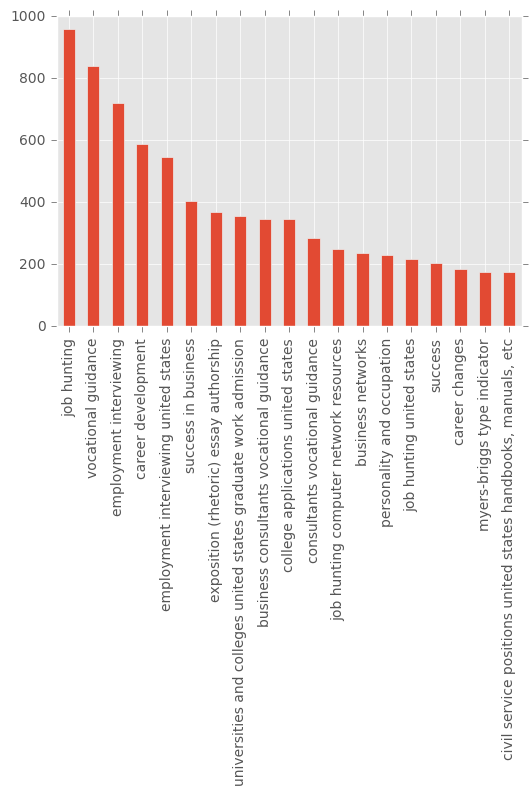

In [62]:
subject_plot_list.plot(kind="bar")